In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn import metrics

In [17]:
df = pd.read_csv('../data/train_data_encoded.csv')
print('shape:', df.shape)
df.head(5)

shape: (28942, 7)


,weight,quality,color,clarity,table_percent,price,depth_percent
0,0.30,3,6,1,0.58,6.353,0.624
1,1.01,4,5,5,0.56,9.183,0.627
2,0.72,4,4,3,0.59,7.983,0.618
3,1.08,2,3,1,0.57,8.371,0.632
4,0.36,3,3,4,0.59,6.588,0.623


In [18]:
#split dara train and test
X = df.drop(["price"], axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)

print("Datos de entrenamiento")
print("-----------------------")
print(y_train.describe())
print('\n')
print("Datos de testeo")
print("-----------------------")
print(y_test.describe())

Datos de entrenamiento
-----------------------
count    23153.000000
mean         7.992375
std          0.993806
min          5.787000
25%          7.156000
50%          8.082000
75%          8.755000
max          9.842000
Name: price, dtype: float64


Datos de testeo
-----------------------
count    5789.000000
mean        8.006556
std         0.986775
min         5.866000
25%         7.189000
50%         8.089000
75%         8.755000
max         9.841000
Name: price, dtype: float64


In [19]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [24]:
param = {"max_depth": [8, 12, 14],
        "max_features": [8, 12],
        "min_samples_split": [10, 25]}

decision_tree = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            n_jobs=-1,
            verbose=1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

%time
decision_tree.fit(X_train, y_train)
best_dt = decision_tree.best_estimator_
print('best tree:', best_dt)
y_pred_test_dt = best_dt.predict(X_test)
y_pred_train_dt = best_dt.predict(X_train)
dt_results_1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decision tree 1")
dt_results_1.style.background_gradient(cmap='coolwarm')

CPU times: user 2 µs, sys: 4 µs, total: 6 µs
Wall time: 8.82 µs
Fitting 10 folds for each of 12 candidates, totalling 120 fits
best tree: DecisionTreeRegressor(max_depth=12, max_features=8, min_samples_split=25)


,MAE,MSE,RMSE,R2,set,modelo
0,0.089418,0.013760,0.117302,0.985867,test,Decision tree 1
1,0.074632,0.009492,0.097426,0.990389,train,Decision tree 1


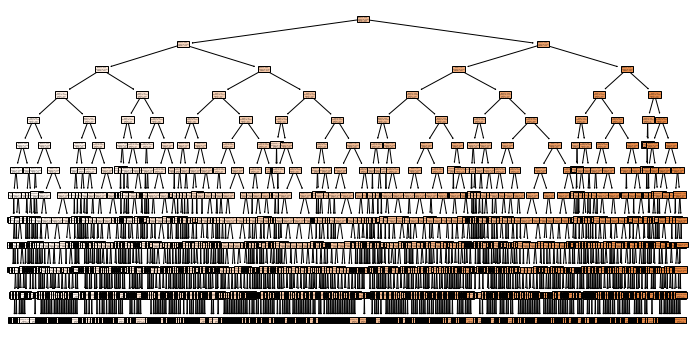

In [21]:
fig = plt.figure(figsize=(12, 6))
tree.plot_tree(best_dt, feature_names=X_train.columns, filled=True);  

In [28]:
param = {"max_depth": [8, 10, 12],
        "max_features": [4, 8],
        "min_samples_split": [10, 50, 100]}

decision_tree = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            n_jobs=-1,
            verbose=1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

%time
decision_tree.fit(X_train, y_train)
best_dt = decision_tree.best_estimator_
print('best tree:', best_dt)
y_pred_test_dt = best_dt.predict(X_test)
y_pred_train_dt = best_dt.predict(X_train)
dt_results_2 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decision tree 2")
dt_results_2.style.background_gradient(cmap='coolwarm')

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs
Fitting 10 folds for each of 18 candidates, totalling 180 fits
best tree: DecisionTreeRegressor(max_depth=12, max_features=8, min_samples_split=50)


,MAE,MSE,RMSE,R2,set,modelo
0,0.091164,0.013957,0.118139,0.985664,test,Decision tree 2
1,0.080921,0.011118,0.105442,0.988743,train,Decision tree 2


In [29]:
param = {"max_depth": [12, 18],
        "max_features": [8, 12],
        "min_samples_split": [10, 50, 100]}

decision_tree = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            n_jobs=-1,
            verbose=1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

%time
decision_tree.fit(X_train, y_train)
best_dt = decision_tree.best_estimator_
print('best tree:', best_dt)
y_pred_test_dt = best_dt.predict(X_test)
y_pred_train_dt = best_dt.predict(X_train)
dt_results_3 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decision tree 3")
dt_results_3.style.background_gradient(cmap='coolwarm')

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
Fitting 10 folds for each of 12 candidates, totalling 120 fits
best tree: DecisionTreeRegressor(max_depth=18, max_features=8, min_samples_split=50)


,MAE,MSE,RMSE,R2,set,modelo
0,0.091047,0.013998,0.118315,0.985621,test,Decision tree 3
1,0.079148,0.010695,0.103418,0.989171,train,Decision tree 3


In [31]:
df_results = pd.concat([dt_results_1, dt_results_2, dt_results_3], axis = 0)
df_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.089418,0.013760,0.117302,0.985867,test,Decision tree 1
1,0.074632,0.009492,0.097426,0.990389,train,Decision tree 1
0,0.091164,0.013957,0.118139,0.985664,test,Decision tree 2
1,0.080921,0.011118,0.105442,0.988743,train,Decision tree 2
0,0.091047,0.013998,0.118315,0.985621,test,Decision tree 3
1,0.079148,0.010695,0.103418,0.989171,train,Decision tree 3
